# 기계학습 (0928) 4주차

김보람  
2022-09-28

## imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import torch

## numpy, torch (선택학습)

### numpy, torch는 엄청 비슷해요

`-` torch.tensor() = np.array() 처럼 생각해도 무방

In [ ]:
np.array([1,2,3]), torch.tensor([1,2,3])

`-` 소수점의 정밀도에서 차이가 있음 (torch가 좀 더 쪼잔함)

In [ ]:
np.array([3.123456789])

In [ ]:
torch.tensor([3.123456789]) #GPU메모리에 저장해서 

`-` 기본적인 numpy 문법은 np 대신에 torch를 써도 무방 // 완전 같지는
않음

In [ ]:
np.arange(10), torch.arange(10)

In [ ]:
np.linspace(0,1,10), torch.linspace(0,1,10)

In [ ]:
np.random.randn(10)

In [ ]:
torch.randn(10)

### length $n$ vector, $n \times 1$ col-vector, $1 \times n$ row-vector

`-` 길이가 3인 벡터 선언방법

In [ ]:
a = torch.tensor([1,2,3])
a.shape

`-` 3x1 col-vec 선언방법

(방법1)

In [ ]:
a = torch.tensor([[1],[2],[3]])
a.shape

(방법2)

In [ ]:
a = torch.tensor([1,2,3]).reshape(3,1)
a.shape

`-` 1x3 row-vec 선언방법

(방법1)

In [ ]:
a = torch.tensor([[1,2,3]])
a.shape

(방법2)

In [ ]:
a = torch.tensor([1,2,3]).reshape(1,3)
a.shape

`-` 3x1 col-vec 선언방법, 1x3 row-vec 선언방법에서 `[[1],[2],[3]]` 혹은
`[[1,2,3]]` 와 같은 표현이 이해안되면 아래링크로 가셔서

https://guebin.github.io/STBDA2022/2022/03/14/(2주차)-3월14일.html

첫번째 동영상 12:15 - 22:45 에 해당하는 분량을 학습하시길 바랍니다.

### torch의 dtype

`-` 기본적으로 torch는 소수점으로 저장되면 dtype=torch.float32 가 된다.
(이걸로 맞추는게 편리함)

In [ ]:
tsr = torch.tensor([1.23,2.34])
tsr

In [ ]:
tsr.dtype

In [ ]:
#float64보다 데이터를 적게 쓴다는 뜻-> float32

`-` 정수로 선언하더라도 dtype를 torch.float32로 바꾸는게 유리함

(안 좋은 선언예시)

In [ ]:
tsr = torch.tensor([1,2])
tsr 

In [ ]:
tsr.dtype

(좋은 선언예시1)

In [ ]:
tsr = torch.tensor([1,2],dtype=torch.float32)
tsr 

In [ ]:
tsr.dtype

(좋은 선언예시2)

In [ ]:
tsr = torch.tensor([1,2.0])
tsr 

In [ ]:
tsr.dtype

(사실 int로 선언해도 나중에 float으로 바꾸면 큰 문제없음)

In [ ]:
tsr = torch.tensor([1,2]).float()
tsr

In [ ]:
tsr.dtype

`-` 왜 정수만으로 torch.tensor를 만들때에도 torch.float32로 바꾸는게
유리할까? $\to$ torch.tensor끼리의 연산에서 문제가 될 수 있음

별 문제 없을수도 있지만

In [ ]:
torch.tensor([1,2])-torch.tensor([1.0,2.0]) 

아래와 같이 에러가 날수도 있다

(에러1)

In [ ]:
torch.tensor([[1.0,0.0],[0.0,1.0]]) @ torch.tensor([[1],[2]]) 

(에러2)

In [ ]:
torch.tensor([[1,0],[0,1]]) @ torch.tensor([[1.0],[2.0]])

(해결1) 둘다 정수로 통일

In [ ]:
torch.tensor([[1,0],[0,1]]) @ torch.tensor([[1],[2]])

(해결2) 둘다 소수로 통일 \<– 더 좋은 방법임

In [ ]:
torch.tensor([[1.0,0.0],[0.0,1.0]]) @ torch.tensor([[1.0],[2.0]])

### shape of vector

`-` 행렬곱셈에 대한 shape 조심

In [ ]:
A = torch.tensor([[2.00,0.00],[0.00,3.00]]) 
b1 = torch.tensor([[-1.0,-5.0]])
b2 = torch.tensor([[-1.0],[-5.0]])
b3 = torch.tensor([-1.0,-5.0])

In [ ]:
A.shape,b1.shape,b2.shape,b3.shape

`-` A@b1: 계산불가, b1@A: 계산가능

In [ ]:
A@b1 #행렬계산이라고 생각

In [ ]:
b1@A

`-` A@b2: 계산가능, b2@A: 계산불가

In [ ]:
A@b2

In [ ]:
b2@A

`-` A@b3: 계산가능, b3@A: 계산가능

In [ ]:
(A@b3).shape ## b3를 마치 col-vec 처럼 해석

In [ ]:
(b3@A).shape ## b3를 마지 row-vec 처럼 해석

`-` 브로드캐스팅

In [ ]:
a = torch.tensor([1,2,3]) #a는 길이가 3인 벡터지만... 연산이 된다.
a - 1

In [ ]:
b = torch.tensor([[1],[2],[3]]) #b는 컬럼 벡터
b - 1

In [ ]:
a - b # a를 row-vec 로 해석 
#불필요한 오류를 막기 위해서 dimension잘 써놓기

## Review: step1~4

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/DL2022/master/_notebooks/2022-09-22-regression.csv") 
df

In [ ]:
torch.tensor(df.x)
#dtype=float32로 지정하면 밑에 dtype=torch.float64가 안붙는다. 메모리를 아끼기위해서 데이터타입을 float32로바꾼다리

In [ ]:
x= torch.tensor(df.x,dtype=torch.float32).reshape(100,1)   
y= torch.tensor(df.y,dtype=torch.float32).reshape(100,1)

# _1 = torch.ones([100,1])
# X = torch.concat([_1,x]),axis=1

X= torch.tensor([[1]*100,x]).T    #torch.ones([100,1])로 써도 됨

In [ ]:


What = torch.tensor([[-5.0],[10.0]],requires_grad=True) # 아무 점이나 주어보자! (-5,10)


What

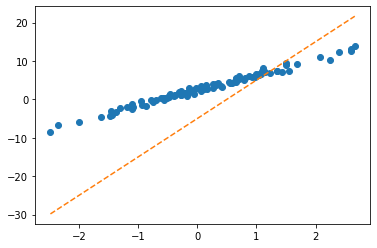

In [ ]:
plt.plot(x,y,'o')
#plt.plot(x,-5+10*x,'--')
plt.plot(x,X@What.data,'--')

### ver1: loss = sum of squares error

In [ ]:
alpha = 1/1000    #학습하는과정에 대한 분류 4가지
What = torch.tensor([[-5.0],[10.0]],requires_grad=True)
for epoc in range(30): 
    # step1: yhat 
    yhat = X@What 
    # step2: loss 
    loss = torch.sum((y-yhat)**2)
    # step3: 미분 
    loss.backward()
    # step4: update 
  #  What.data = What.data - 1/000 * What.grad   # alpha = 1/000
  #  What.grad = None #              # gradient청소...

    What.data = What.data - alpha * What.grad 
    What.grad = None # 

In [ ]:
What

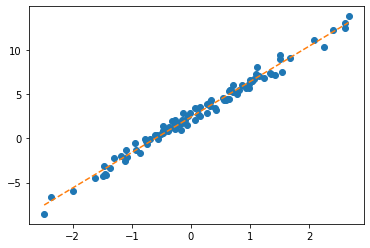

In [ ]:
plt.plot(x,y,'o') 
plt.plot(x,X@What.data,'--')

-   note: 왜 What = What - alpha\*What.grad 는 안되는지?

### ver2: loss = mean squared error = MSE

In [ ]:
alpha = 1/10
What = torch.tensor([[-5.0],[10.0]],requires_grad=True)
for epoc in range(30): 
    # step1: yhat 
    yhat = X@What 
    # step2: loss 
    loss = torch.mean((y-yhat)**2)   # 위랑 다른거 여기 mean!!!! 
    # step3: 미분 
    loss.backward()
    # step4: update 
    What.data = What.data - alpha * What.grad 
    What.grad = None # 

    # mean으로 하면 좋은거: 100개읟 ㅔ이터 1/1000 학습률 
    # sample size가 달라질때마다 학습률 설정이 힘든데, mean으로 하면 데이터set이 계속 할수잇어서!!

In [ ]:
What

## step1의 다른버전 – net 설계만

### ver1: net = torch.nn.Linear(1,1,bias=True)

In [ ]:
torch.manual_seed(43052)
net = torch.nn.Linear(in_features=1, out_features=1, bias=True)  # 함수를 만들어준다. x가들어가면 y가 나오는 것 가틍ㄴ..

# x.shape 했을때 torch.size(100,1) 이 나온다. 100은 observation이고 뒤쪽에 있는 1이 in_features!!
# out_features는 y.shape의 뒤쪽,,

# net.bias, net.weight 하면 tensor 0.2366 -> w0역할... tensor -0.8791 -> w1역할 
# 위 숫자는 최초의 숫자라 아무거나 찍은거 실행할때마다 달라질수 있음.
# 맨 위에 seed를 주면 나중에 교수님 강의할때 편하게` 하려고 

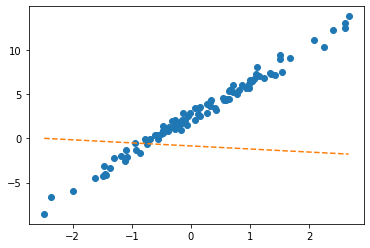

In [ ]:
plt.plot(x,y,'o')
plt.plot(x,net(x).data,'--')

`-` net에서 $\hat{w}_0, \hat{w}_1$ 의 값은?

In [ ]:
net.weight # w1 

In [ ]:
net.bias # w0 

In [ ]:
_yhat = -0.8470 + -0.3467*x 

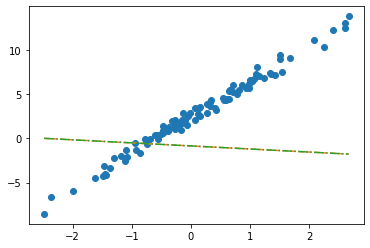

In [ ]:
plt.plot(x,y,'o')
plt.plot(x, _yhat,'--')
plt.plot(x,net(x).data,'-.')

`-` 수식표현:
$\hat{y}_i = \hat{w}_0 + \hat{w}_1 x_i = \hat{b} + \hat{w}x_i = -0.8470 + -0.3467 x_i$
for all $i=1,2,\dots,100$.

### ver2: net = torch.nn.Linear(2,1,bias=False)

`-` 입력이 x가 아닌 X를 넣고 싶다면? (보통 잘 안하긴 해요, 왜?
bias=False로 주는게 귀찮거든요) - X는 바이어스가 고려된 상황

In [ ]:
net(X) ## 그대로 쓰면 당연히 에러

In [ ]:
torch.manual_seed(43052)
net = torch.nn.Linear(in_features=2, out_features=1, bias=False) #bias=false:뒤쪽에 더해지는 값인거 같으니까....

# out_features=3으로 쓰면 shape이 [100,3] 된다,,,,,,,,,,, 1이 되야해,,

In [ ]:
net.weight

In [ ]:
net.bias # false로 설정해서 아무것도 안뜸

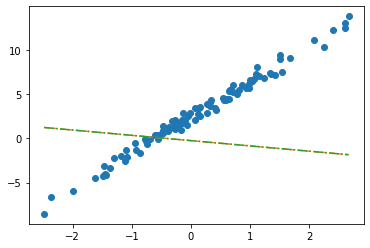

In [ ]:
plt.plot(x,y,'o') 
plt.plot(x,net(X).data, '--')
plt.plot(x,X@torch.tensor([[-0.2451],[-0.5989]]), '-.')

`-` 수식표현:
$\hat{\bf y} = {\bf X} {\bf \hat W} = \begin{bmatrix} 1 & x_1 \\ 1 & x_2 \\ \dots & \dots \\ 1 & x_{100} \end{bmatrix} \begin{bmatrix} -0.2451 \\ -0.5989 \end{bmatrix}$

### 잘못된사용1

In [ ]:
_x = x.reshape(-1)

In [ ]:
_x

In [ ]:
torch.manual_seed(43052)
net = torch.nn.Linear(in_features=1,out_features=1) 

In [ ]:
net(_x) #이렇게 하면 에러메시지뜬다리 
# net(_x.reshape(100,1))로 바궈줘야 한다.

### 잘못된사용2

In [ ]:
torch.manual_seed(43052)
net = torch.nn.Linear(in_features=2,out_features=1) # bias=False를 깜빡.. bias=true로 설정됨 기본으로 

In [ ]:
net.weight

In [ ]:
net.bias

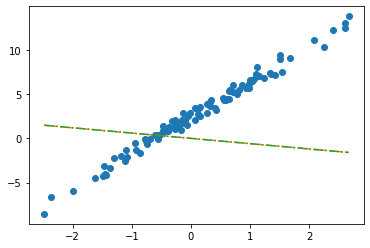

In [ ]:
plt.plot(x,y,'o')
plt.plot(x,net(X).data,'--')
plt.plot(x,X@torch.tensor([[-0.2451],[-0.5989]])+0.2549,'-.')
# b hat = 0.2549 의도와는 다르게 모델링 된것..


# plt.plot(x,X@torch.tensor([[-0.2451],[-0.5989]]),'-.')
# bias=f일때

-   수식표현:
    $\hat{\bf y} = {\bf X} {\bf \hat W} + \hat{b}= \begin{bmatrix} 1 & x_1 \\ 1 & x_2 \\ \dots & \dots \\ 1 & x_{100} \end{bmatrix} \begin{bmatrix} -0.2451 \\ -0.5989 \end{bmatrix} + 0.2549$

## step1의 다른버전 – 끝까지

### ver1: net = torch.nn.Linear(1,1,bias=True)

`-` 준비

In [ ]:
net = torch.nn.Linear(1,1,bias=True) # in_features=1 에서 1만 써도 뎀, bias 생략해도 뎀
net.weight.data = torch.tensor([[10.0]])
net.bias.data = torch.tensor([-5.0])
net.weight,net.bias

`-` step1

In [ ]:
yhat = net(x)  # -5 + 10x 가 첫 값으로 나올것,,,

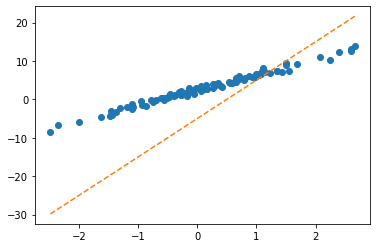

In [ ]:
plt.plot(x,y,'o')
plt.plot(x,net(x).data,'--')

`-` step2

In [ ]:
loss = torch.mean((y-yhat)**2)

`-` step3

(미분전)

In [ ]:
net.bias,net.weight

In [ ]:
net.bias.grad, net.weight.grad   #grad값이 없는데.... 

(미분)

In [ ]:
loss.backward()

(미분후)

In [ ]:
net.bias,net.weight

In [ ]:
net.bias.grad,net.weight.grad    # 미분후에 값 자체는 변화가 없지만 grad값이 

`-` step4

(업데이트전)

In [ ]:
net.bias,net.weight

In [ ]:
net.bias.grad, net.weight.grad

(업데이트)

In [ ]:
net.bias.data = net.bias.data - 0.1*net.bias.grad   # 기울기 0.1
net.weight.data = net.weight.data - 0.1*net.weight.grad 

In [ ]:
net.bias.grad = None  # 바뀌기만 하고 청소가 안된상태ㅣ니까 none값으로 지정해주기...
net.weight.grad = None 

(업데이트후)

In [ ]:
net.bias,net.weight

In [ ]:
net.bias.grad, net.weight.grad

`-` 반복

In [ ]:
for epoc in range(30):
    # step1
    yhat = net(x) 
    # step2
    loss = torch.mean((y-yhat)**2)
    # step3
    loss.backward()
    # step4
    net.weight.data = net.weight.data - 0.1*net.weight.grad
    net.bias.data = net.bias.data - 0.1*net.bias.grad
    net.weight.grad = None
    net.bias.grad = None

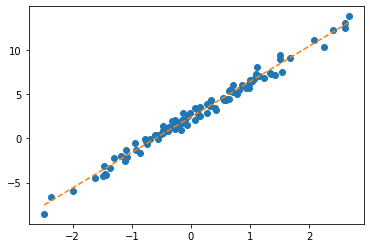

In [ ]:
plt.plot(x,y,'o')
plt.plot(x,net(x).data,'--')

### ver2: net = torch.nn.Linear(2,1,bias=False)

`-` 준비

In [ ]:
net = torch.nn.Linear(2,1,bias=False)
net.weight.data = torch.tensor([[-5.0, 10.0]])

`-` step1

In [ ]:
yhat = net(X)

`-` step2

In [ ]:
loss = torch.mean((y-yhat)**2)

`-` step3

(미분전)

In [ ]:
net.weight

In [ ]:
net.weight.grad

(미분)

In [ ]:
loss.backward()

(미분후)

In [ ]:
net.weight

In [ ]:
net.weight.grad

`-` step4

(업데이트전)

In [ ]:
net.weight

In [ ]:
net.weight.grad

(업데이트)

In [ ]:
net.weight.data = net.weight.data - 0.1*net.weight.grad

In [ ]:
net.weight.grad = None

(업데이트후)

In [ ]:
net.weight

In [ ]:
net.weight.grad

`-` 반복

In [ ]:
net = torch.nn.Linear(2,1,bias=False)
net.weight.data = torch.tensor([[-5.0, 10.0]])

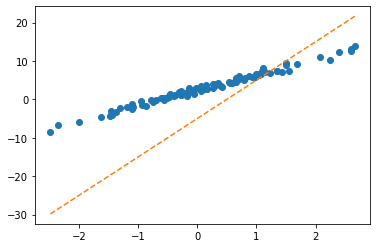

In [ ]:
plt.plot(x,y,'o')
plt.plot(x,net(X).data,'--')

In [ ]:
for epoc in range(30):
    # step1
    yhat = net(X)
    # step2 
    loss = torch.mean((y-yhat)**2)
    # step3
    loss.backward()
    # step4
    net.weight.data = net.weight.data - 0.1*net.weight.grad
    net.weight.grad = None

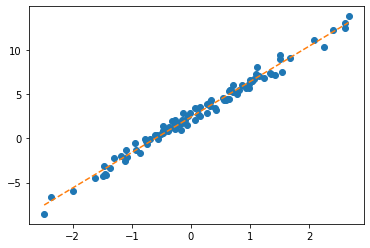

In [ ]:
plt.plot(x,y,'o')
plt.plot(x,net(X).data,'--')

## step4의 다른버전: 옵티마이저!

### ver1: net = torch.nn.Linear(1,1,bias=True)

`-` 준비

In [ ]:
net = torch.nn.Linear(1,1) 
net.weight.data = torch.tensor([[10.0]]) 
net.bias.data = torch.tensor([[-5.0]]) 

In [ ]:
optimizr = torch.optim.SGD(net.parameters(),lr=1/10) # step4가 너무 귀찮기 때문에 net파라미터를 받아서 업데이트하고 청소해주는 오브젝트를 하나 만들기
# optim.SGD(parameter, lr(alpha)=0.1)
# net.parameters() = generator 어쩌고 튀어나오는데 이거 넣어주기 

`-` step1~3

In [ ]:
yhat = net(x)     

In [ ]:
loss = torch.mean((y-yhat)**2) 

In [ ]:
loss.backward() 

`-` step4

(update 전)

In [ ]:
net.weight.data, net.bias.data ## 값은 업데이트 전

In [ ]:
net.weight.grad, net.bias.grad ## 미분값은 청소전 

(update)

In [ ]:
optimizr.step()  # update 진행해줌
optimizr.zero_grad() # grad값 청소

(update 후)

In [ ]:
net.weight.data, net.bias.data ## 값은 업데이트 되었음 

In [ ]:
net.weight.grad, net.bias.grad ## 미분값은 0으로 초기화하였음 

`-` 반복

In [ ]:
net = torch.nn.Linear(1,1) 
net.weight.data = torch.tensor([[10.0]])
net.bias.data = torch.tensor([-5.0])
optimizr = torch.optim.SGD(net.parameters(),lr=1/10) 

In [ ]:
plt.plot(x,y,'o')
plt.plot(x,net(x).data,'--')

In [ ]:
for epoc in range(30): 
    # step1
    yhat = net(x)
    # step2
    loss = torch.mean((y-yhat)**2) 
    # step3
    loss.backward()
    # step4 
    optimizr.step(); optimizr.zero_grad() 

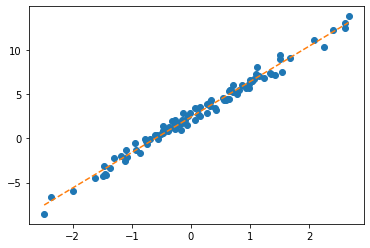

In [ ]:
plt.plot(x,y,'o')
plt.plot(x,net(x).data,'--')

### ver2: net = torch.nn.Linear(2,1,bias=False)

`-` 바로 반복하겠습니다..

In [ ]:
net = torch.nn.Linear(2,1,bias=False) 
net.weight.data = torch.tensor([[-5.0, 10.0]])
optimizr = torch.optim.SGD(net.parameters(),lr=1/10) 

In [ ]:
for epoc in range(30): 
    yhat = net(X)              # ver1에서는 스몰x였는데 여기서는 라지X
    loss = torch.mean((y-yhat)**2) 
    loss.backward() 
    optimizr.step(); optimizr.zero_grad() 

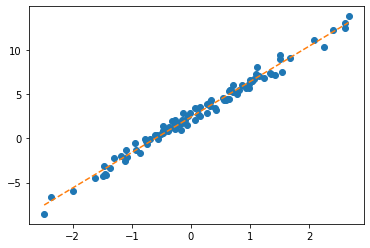

In [ ]:
plt.plot(x,y,'o')
plt.plot(x,net(X).data,'--')

------------------------------------------------------------------------

## Appendix: `net.parameters()`의 의미? (선택학습)

`-` iterator, generator의 개념필요 -
https://guebin.github.io/IP2022/2022/06/06/(14주차)-6월6일.html,
클래스공부 8단계 참고

`-` 탐구시작: 네트워크 생성

In [ ]:
net = torch.nn.Linear(in_features=1,out_features=1)
net.weight

In [ ]:
net.bias

`-` torch.optim.SGD? 를 확인하면 params에 대한설명에 아래와 같이
되어있음

    params (iterable): iterable of parameters to optimize or dicts defining
            parameter groups

`-` 설명을 읽어보면 params에 iterable object를 넣으라고 되어있음
(iterable object는 숨겨진 명령어로 `__iter__`를 가지고 있는 오브젝트를
의미)

In [ ]:
set(dir(net.parameters)) & {'__iter__'}

In [ ]:
set(dir(net.parameters())) & {'__iter__'}

`-` 무슨의미?

In [ ]:
_generator = net.parameters()

In [ ]:
_generator.__next__()

In [ ]:
_generator.__next__()

In [ ]:
_generator.__next__()

`-` 이건 이런느낌인데?

In [ ]:
_generator2 = iter([net.weight,net.bias])

In [ ]:
_generator2

In [ ]:
_generator2.__next__()

In [ ]:
_generator2.__next__()

In [ ]:
_generator2.__next__()

`-` 즉 아래는 같은코드이다.

``` python
### 코드1
_generator = net.parameters() 
torch.optim.SGD(_generator,lr=1/10) 
### 코드2
_generator = iter([net.weight,net.bias])
torch.optim.SGD(_generator,lr=1/10) 
### 코드3 (이렇게 써도 코드2가 실행된다고 이해할 수 있음)
_iterator = [net.weight,net.bias]
torch.optim.SGD(_iterator,lr=1/10) 
```

결론: `net.parameters()`는 net오브젝트에서 학습할 파라메터를 모두 모아
리스트(iterable object)로 만드는 함수라 이해할 수 있다.

`-` 응용예제1

In [ ]:
What = torch.tensor([[-5.0],[10.0]],requires_grad=True)
optimizr = torch.optim.SGD([What],lr=1/10) 

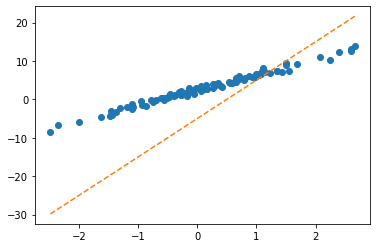

In [ ]:
plt.plot(x,y,'o')
plt.plot(x,(X@What).data,'--')

In [ ]:
for epoc in range(30):
    yhat = X@What 
    loss = torch.mean((y-yhat)**2)
    loss.backward()
    optimizr.step();optimizr.zero_grad() 

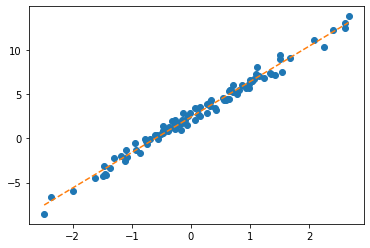

In [ ]:
plt.plot(x,y,'o')
plt.plot(x,(X@What).data,'--')

`-` 응용예제2

In [ ]:
b = torch.tensor(-5.0,requires_grad=True)
w = torch.tensor(10.0,requires_grad=True)
optimizr = torch.optim.SGD([b,w],lr=1/10)

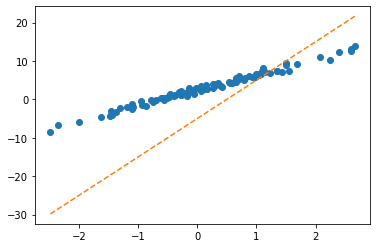

In [ ]:
plt.plot(x,y,'o')
plt.plot(x,(w*x+b).data,'--')

In [ ]:
for epoc in range(30):
    yhat = b+ w*x 
    loss = torch.mean((y-yhat)**2)
    loss.backward()
    optimizr.step(); optimizr.zero_grad()

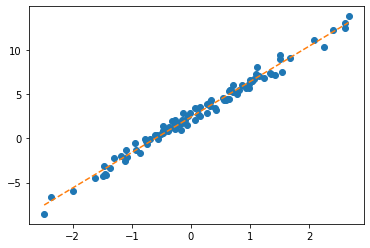

In [ ]:
plt.plot(x,y,'o')
plt.plot(x,(w*x+b).data,'--')

## Logistic regression

### motive

`-` 현실에서 이런 경우가 많음 - $x$가 커질수록 (혹은 작아질수록)
성공확률이 증가함.

In [ ]:
# EX) x는 학점이고.. y는 취업할 확률

`-` (X,y)는 어떤모양?

In [ ]:
_df = pd.DataFrame({'x':range(-6,7),'y':[0,0,0,0,0,0,1,0,1,1,1,1,1]})
_df 

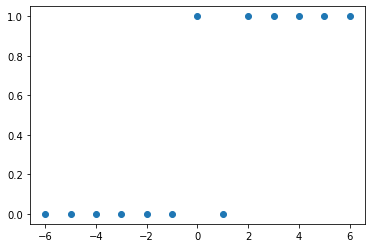

In [ ]:
plt.plot(_df.x,_df.y,'o')

`-` (예비학습) 시그모이드라는 함수가 있음

In [ ]:
xx = torch.linspace(-6,6,100)   # -6에서 6까지 100개..
def f(x):
    return torch.exp(x)/(1+torch.exp(x))  

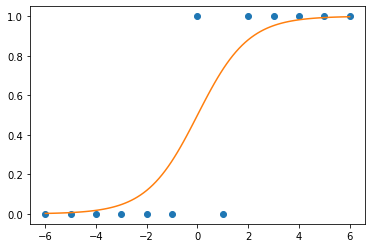

In [ ]:
plt.plot(_df.x,_df.y,'o')
plt.plot(xx,f(xx))   # f(xx) = f(1*xx) 얌.. 근데 만약 f(5*xx)하면 기울기가 더 급해져.. 애매한 부분이 더 적어지고 스펙에 대한 영향을 ... f(2.5*xx)-1.2 (우측으로 1.2 이동) 이렇게 튜닝이 가능

### model

`-` $x$가 커질수록 $y=1$이 잘나오는 모형은 아래와 같이 설계할 수 있음
\<— 외우세요!!!

-   \$y_i Ber(\_i),\$ where
    $\pi_i = \frac{\exp(w_0+w_1x_i)}{1+\exp(w_0+w_1x_i)}$

-   $\hat{y}_i= \frac{\exp(\hat{w}_0+\hat{w}_1x_i)}{1+\exp(\hat{w}_0+\hat{w}_1x_i)}=\frac{1}{1+\exp(-\hat{w}_0-\hat{w}_1x_i)}$

-   $loss= - \sum_{i=1}^{n} \big(y_i\log(\hat{y}_i)+(1-y_i)\log(1-\hat{y}_i)\big)$
    \<— 외우세요!!

In [ ]:
# 베르누이.. pi i 라는 건.. 왜 p가 아니고 pi냐? 사람마다 합격할 확률이 다르기 때문에.
# x가 무한대로 가면 pi i 는 1에 가까워지고 마이너스 무한대로 가면 0에가까워진다

# loss는 MSE로 하긴 어렵고,, 라이클리우드?????????? 설명이기니까 위에 그냥 외우기
# y i = 0 일대랑 1 일때 저식에 넣어서 그래프 그려서 생각해보기... loss는 yi랑 y값이 비슷하면 loss 값이 작아짐

### toy example

`-` 예제시작

In [ ]:
x=torch.linspace(-1,1,2000).reshape(2000,1)
w0= -1 
w1= 5 
u = w0+x*w1 
v = torch.exp(u)/(1+torch.exp(u)) # v=πi, 즉 확률을 의미함,  v는 성공할확률
y = torch.bernoulli(v) 

# torch.bernoulli(toch.tensor([0.5]*100))   0,1 반복해서 뽑힘. 0.5는 확률!!!!!

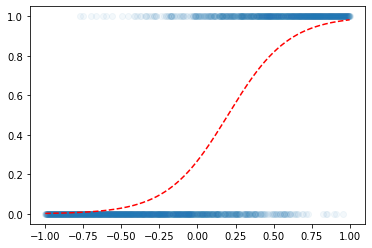

In [ ]:
plt.scatter(x,y,alpha=0.05)   # 여기서 알파가 투명도인듯??????????? 
plt.plot(x,v,'--r')

-   우리의 목적: $x$가 들어가면 빨간선 $\hat{y}$의 값을 만들어주는
    mapping을 학습해보자.

In [ ]:
# 최초의 곡선
# w0hat = -1
# w1hat = 3


# yhat = f(w0hat+x*w1hat)
# plt.plot(x,y, 'o', alpha=0.05)   
# plt.plot(x,v,'--')
# plt.plot(x,yhat,'--r')

In [ ]:
# sigmoid함수만들엇던걸...............

## 숙제